# 2nd Order Optimization 

## Newtons Method

### Part 2

## Newton's method optimization

In [1]:
from sympy import *
from sympy.parsing import sympy_parser as spp

import numpy as np
import matplotlib.pyplot as plt

### Hyperparams

In [2]:
plot_from = -7.0
plot_to = 7.0
plot_step = 0.1

target_precision = 0.3

sd_iters = 100000
display_freq = sd_iters//10

m = Matrix(symbols('x1 x2'))

In [3]:
def dfdx(x,g):
    return [float(g[i].subs(m[0],x[0]).subs(m[1],x[1])) for i in range(len(g))]

In [9]:
def sd(obj,x_start,x_result,alpha=0.0002):
    '''
    Steepest Descent - 1st Order Optimization
    '''
    print('Steepest Descent - Start')
    
    #Gradient
    g = [diff(obj,i) for i in m]
    #Initialize xs
    xs = [[0.0,0.0]]
    xs[0] = x_start
    #Get gradient at start location (dx/df or grad(f))
    iter_s = 0
    while np.linalg.norm(xs[-1] - x_result) > target_precision:
        if(iter_s % display_freq == 0):
            print ('Steepest Descent - Distance: ',np.linalg.norm(xs[-1] - x_result))
        gs = dfdx(xs[iter_s],g)
        #Compute search direction and magnitude (dx)
        #With dx = -grad but no line searching
        xs.append(xs[iter_s] - np.dot(alpha,gs))
        if(iter_s % display_freq == 0):
            print('Last xs:',xs[-1])
        iter_s += 1
        if iter_s > sd_iters:
            break
    
    print('Steepest Descent - Result distance: ', np.linalg.norm(xs[-1] - x_result))
    xs = np.array(xs)
    plt.plot(xs[:,0],xs[:,1],'g-o')

In [10]:
def nm(obj,x_start,x_result):
    '''
    Newton's method - 2nd order optimization
    '''
    print ('Newton\'s method - Start')
    
    #Gradient
    g = [diff(obj,i) for i in m]
    #Hessian Matrix
    H = Matrix([[diff(g[j],m[i]) for i in range(len(m))] for j in range(len(g))])
    H_inv = H.inv()
    
    xn = [[0,0]] #Newton's method result global for comparison
    xn[0] = x_start
    
    iter_n = 0
    while np.linalg.norm(xn[-1] - x_result) > target_precision:
        print ('Newton\'s method - Distance: ',np.linalg.norm(xn[-1] - x_result))
        gn = Matrix(dfdx(xn[iter_n],g))
        delta_xn = -H_inv * gn
        delta_xn = delta_xn.subs(m[0],xn[iter_n][0]).subs(m[1],xn[iter_n][1])
        
        #Transform to numpy.ndarray to avoid np.linalg.norm error with 'Float' data type
        aux = []
        for elem in Matrix(xn[iter_n]) + delta_xn:
            aux.append(elem)
            
        aux = np.array(aux).astype(np.float64)        
        xn.append(aux)
        iter_n += 1
    print ('Newton\'s method - Result Distance: ',np.linalg.norm(xn[-1] - x_result))
    
    xn = np.array(xn)
    plt.plot(xn[:,0],xn[:,1],'k-o')

### Test & Plot

In [11]:
def run_and_plot_quadratic():
    #Quadratic function
    x_start = [-4.0,6.0]
    obj = spp.parse_expr('x1**2 - 2* x1 * x2 + 4 * x2 ** 2')
    x_result = np.array([0.0,0.0])
    
    #Design variables at mesh points
    i1 = np.arange(plot_from,plot_to,plot_step)
    i2 = np.arange(plot_from,plot_to,plot_step)
    x1_mesh,x2_mesh = np.meshgrid(i1,i2)
    f_str = obj.__str__().replace('x1','x1_mesh').replace('x2','x2_mesh')
    f_mesh = eval(f_str)
    
    #Create contour plot
    plt.figure()
    plt.imshow(f_mesh,cmap='Paired',origin='lower',extent=[plot_from - 20, plot_to + 20, plot_from - 20, plot_to + 2])
    plt.colorbar()
    
    #Add some text
    plt.title('f(x) = ' + str(obj))
    plt.xlabel('x1')
    plt.ylabel('x2')
    nm(obj,x_start,x_result)
    sd(obj,x_start,x_result,alpha=0.05)
    plt.show()

In [15]:
def run_and_plot_rosenbrock():
    #Rosenbrock function
    x_start = [-4.0,-5.0]
    obj = spp.parse_expr('(1-x1)**2 + 100 * (x2 - x1**2)**2')
    x_result = np.array([1,1])
    
    #Design variables at mesh points
    i1 = np.arange(plot_from,plot_to,plot_step)
    i2 = np.arange(plot_from,plot_to,plot_step)
    x1_mesh,x2_mesh = np.meshgrid(i1,i2)
    f_str = obj.__str__().replace('x1','x1_mesh').replace('x2','x2_mesh')
    f_mesh = eval(f_str)
    
    #Create contour plot
    plt.figure()
    plt.imshow(f_mesh,cmap='Paired',origin='lower',extent=[plot_from - 20, plot_to + 20, plot_from - 20, plot_to + 2])
    plt.colorbar()
    
    #Add some text
    plt.title('f(x) = ' + str(obj))
    plt.xlabel('x1')
    plt.ylabel('x2')
    nm(obj,x_start,x_result)
    sd(obj,x_start,x_result,alpha=0.0002)
    plt.show()

### Test

Newton's method - Start
Newton's method - Distance:  7.21110255093
Newton's method - Result Distance:  8.881784197e-16
Steepest Descent - Start
Steepest Descent - Distance:  7.21110255093
Last xs: [-3.   3.2]
Steepest Descent - Result distance:  0.296903326124


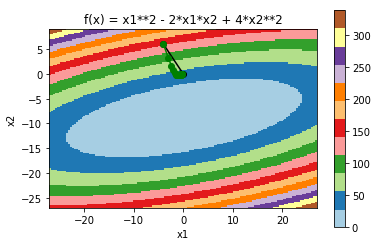

In [16]:
run_and_plot_quadratic()

Newton's method - Start
Newton's method - Distance:  7.81024967591
Newton's method - Distance:  15.8019791126
Newton's method - Distance:  24.9767763339
Newton's method - Result Distance:  0.00316344535058
Steepest Descent - Start
Steepest Descent - Distance:  7.81024967591
Last xs: [ 2.722 -4.16 ]
Steepest Descent - Distance:  0.372833579499
Last xs: [ 0.82088332  0.67305302]
Steepest Descent - Result distance:  0.299979125659


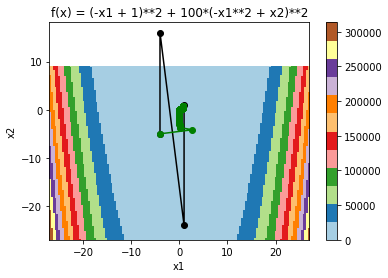

In [17]:
run_and_plot_rosenbrock()